# This script contains: 

## 1. Import libraries
## 2. Import data
## 3. Prep data for supervised algorithm
    3.1 Drop unnecessary columns
    3.2 Define X and y variables
    3.3 Split into test and training datasets
## 4. ANN Algorithm (Artifical Neural Network)
    4.1 

## 1. Import libraries

In [46]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

## 2. Import data

In [3]:
# Create path
path = r'C:\Users\ashle\Documents\10-2024 Climate Analysis'

In [5]:
# Import scaled weather station data
df_scaled = pd.read_pickle(os.path.join(path, 'Data Sets', 'weather-prediction-dataset_scaled.pkl'))

In [7]:
# Import 'answers' data set
answers = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [9]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [11]:
df_scaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE,MONTH
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,1.317965,0.660721,-0.348893,-0.268791,-0.927601,-0.667864,-1.158624,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.02373,1.864672,-0.008724,-1

In [13]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Missing columns from 'answers': GDANSK ROMA TOURS

## 3. Prep data for supervised algorithm

### 3.1 Drop unnecessary columns

In [15]:
df_scaled.shape

(22950, 170)

In [17]:
# Drop columns in scaled data set to align with the 'answers' dataframe. 

def drop_specific_columns(df):
    # List of substrings to check for in column names
    substrings = ['GDANSK_', 'ROMA_', 'TOURS_']
    
    # Filter out columns containing the any of the substrings
    columns_to_drop = [col for col in df.columns if any(sub in col for sub in substrings)]

    # Drop the identified columns and return the modified DataFrame
    df = df.drop(columns=columns_to_drop)
    return df

In [19]:
# Apply function to scaled dataframe
df_scaled = drop_specific_columns(df_scaled)

In [21]:
# Compare df shape after dropping columns
df_scaled.shape

(22950, 149)

In [23]:
df_scaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE,MONTH
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.02373,1.864672,-0.008724,-1.203514,-0.406430,-1.149211,-1.370824,-1.125110,-1.578385,0.703568,2.336053,0.267752,-1.043873,-1.052433,0.252496,-0.810834,-0.097084,0.382899,-0.387967,0.855172,-1.419038,1.887115,1.149046,-1.423735,-0.315682,-1.521762,-0.988280,-0.877723,-1.044732,-0.093824,-0.746542,-1.244144,-0.282933,-0.30647,-1.098059,-0.265742,-0.505735,-0.350849,1.111743,0.816809,1.544023,-1.142400,-1.067870,1.925426,-0.470091,-1.018677,-0

In [25]:
# Drop DATE and MONTH columns from df_scaled
df_scaled = df_scaled.drop(columns = ['DATE', 'MONTH'])

In [27]:
# Check updated df_scaled dataframe
df_scaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.02373,1.864672,-0.008724,-1.203514,-0.406430,-1.149211,-1.370824,-1.125110,-1.578385,0.703568,2.336053,0.267752,-1.043873,-1.052433,0.252496,-0.810834,-0.097084,0.382899,-0.387967,0.855172,-1.419038,1.887115,1.149046,-1.423735,-0.315682,-1.521762,-0.988280,-0.877723,-1.044732,-0.093824,-0.746542,-1.244144,-0.282933,-0.30647,-1.098059,-0.265742,-0.505735,-0.350849,1.111743,0.816809,1.544023,-1.142400,-1.067870,1.925426,-0.470091,-1.018677,-0.186575,0.0

In [29]:
# Drop DATE column from 'answers' dataframe
answers = answers.drop(columns = ['DATE'])

In [31]:
# Check updated 'answers' dataframe
answers.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3.2 Define X and y variables

In [33]:
# Define X, y variables

X = df_scaled # Independent variable
y = answers # Dependent variable

In [35]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


### 3.3 Split into test and training datasets

In [37]:
# Split the data into two sets: a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=27)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16065, 147)
(6885, 147)
(16065, 15)
(6885, 15)


## 4. ANN Algorithm (Artificial Neural Network)

Data is already scaled

In [41]:
# Create the ANN
mlp = MLPClassifier(hidden_layer_sizes = (5, 5), max_iter = 500, tol = 0.0001)

# Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [48]:
# Generate predictions on training and test sets
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

# Print classification reports for training and test sets
print("Training Set Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_test))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      3926
           1       0.79      0.77      0.78      5570
           2       0.88      0.88      0.88      5193
           3       0.79      0.79      0.79      3110
           4       0.80      0.83      0.82      3438
           5       0.69      0.64      0.66      3432
           6       0.72      0.70      0.71      2630
           7       0.76      0.77      0.77      4431
           8       0.82      0.84      0.83      3329
           9       0.96      0.97      0.96      7116
          10       0.74      0.76      0.75      3347
          11       0.77      0.65      0.71      2463
          12       0.00      0.00      0.00         0
          13       0.78      0.64      0.70      2715
          14       0.57      0.06      0.11       823

   micro avg       0.81      0.78      0.80     51523
   macro avg       0.72      0.67      0.68 

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-package

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


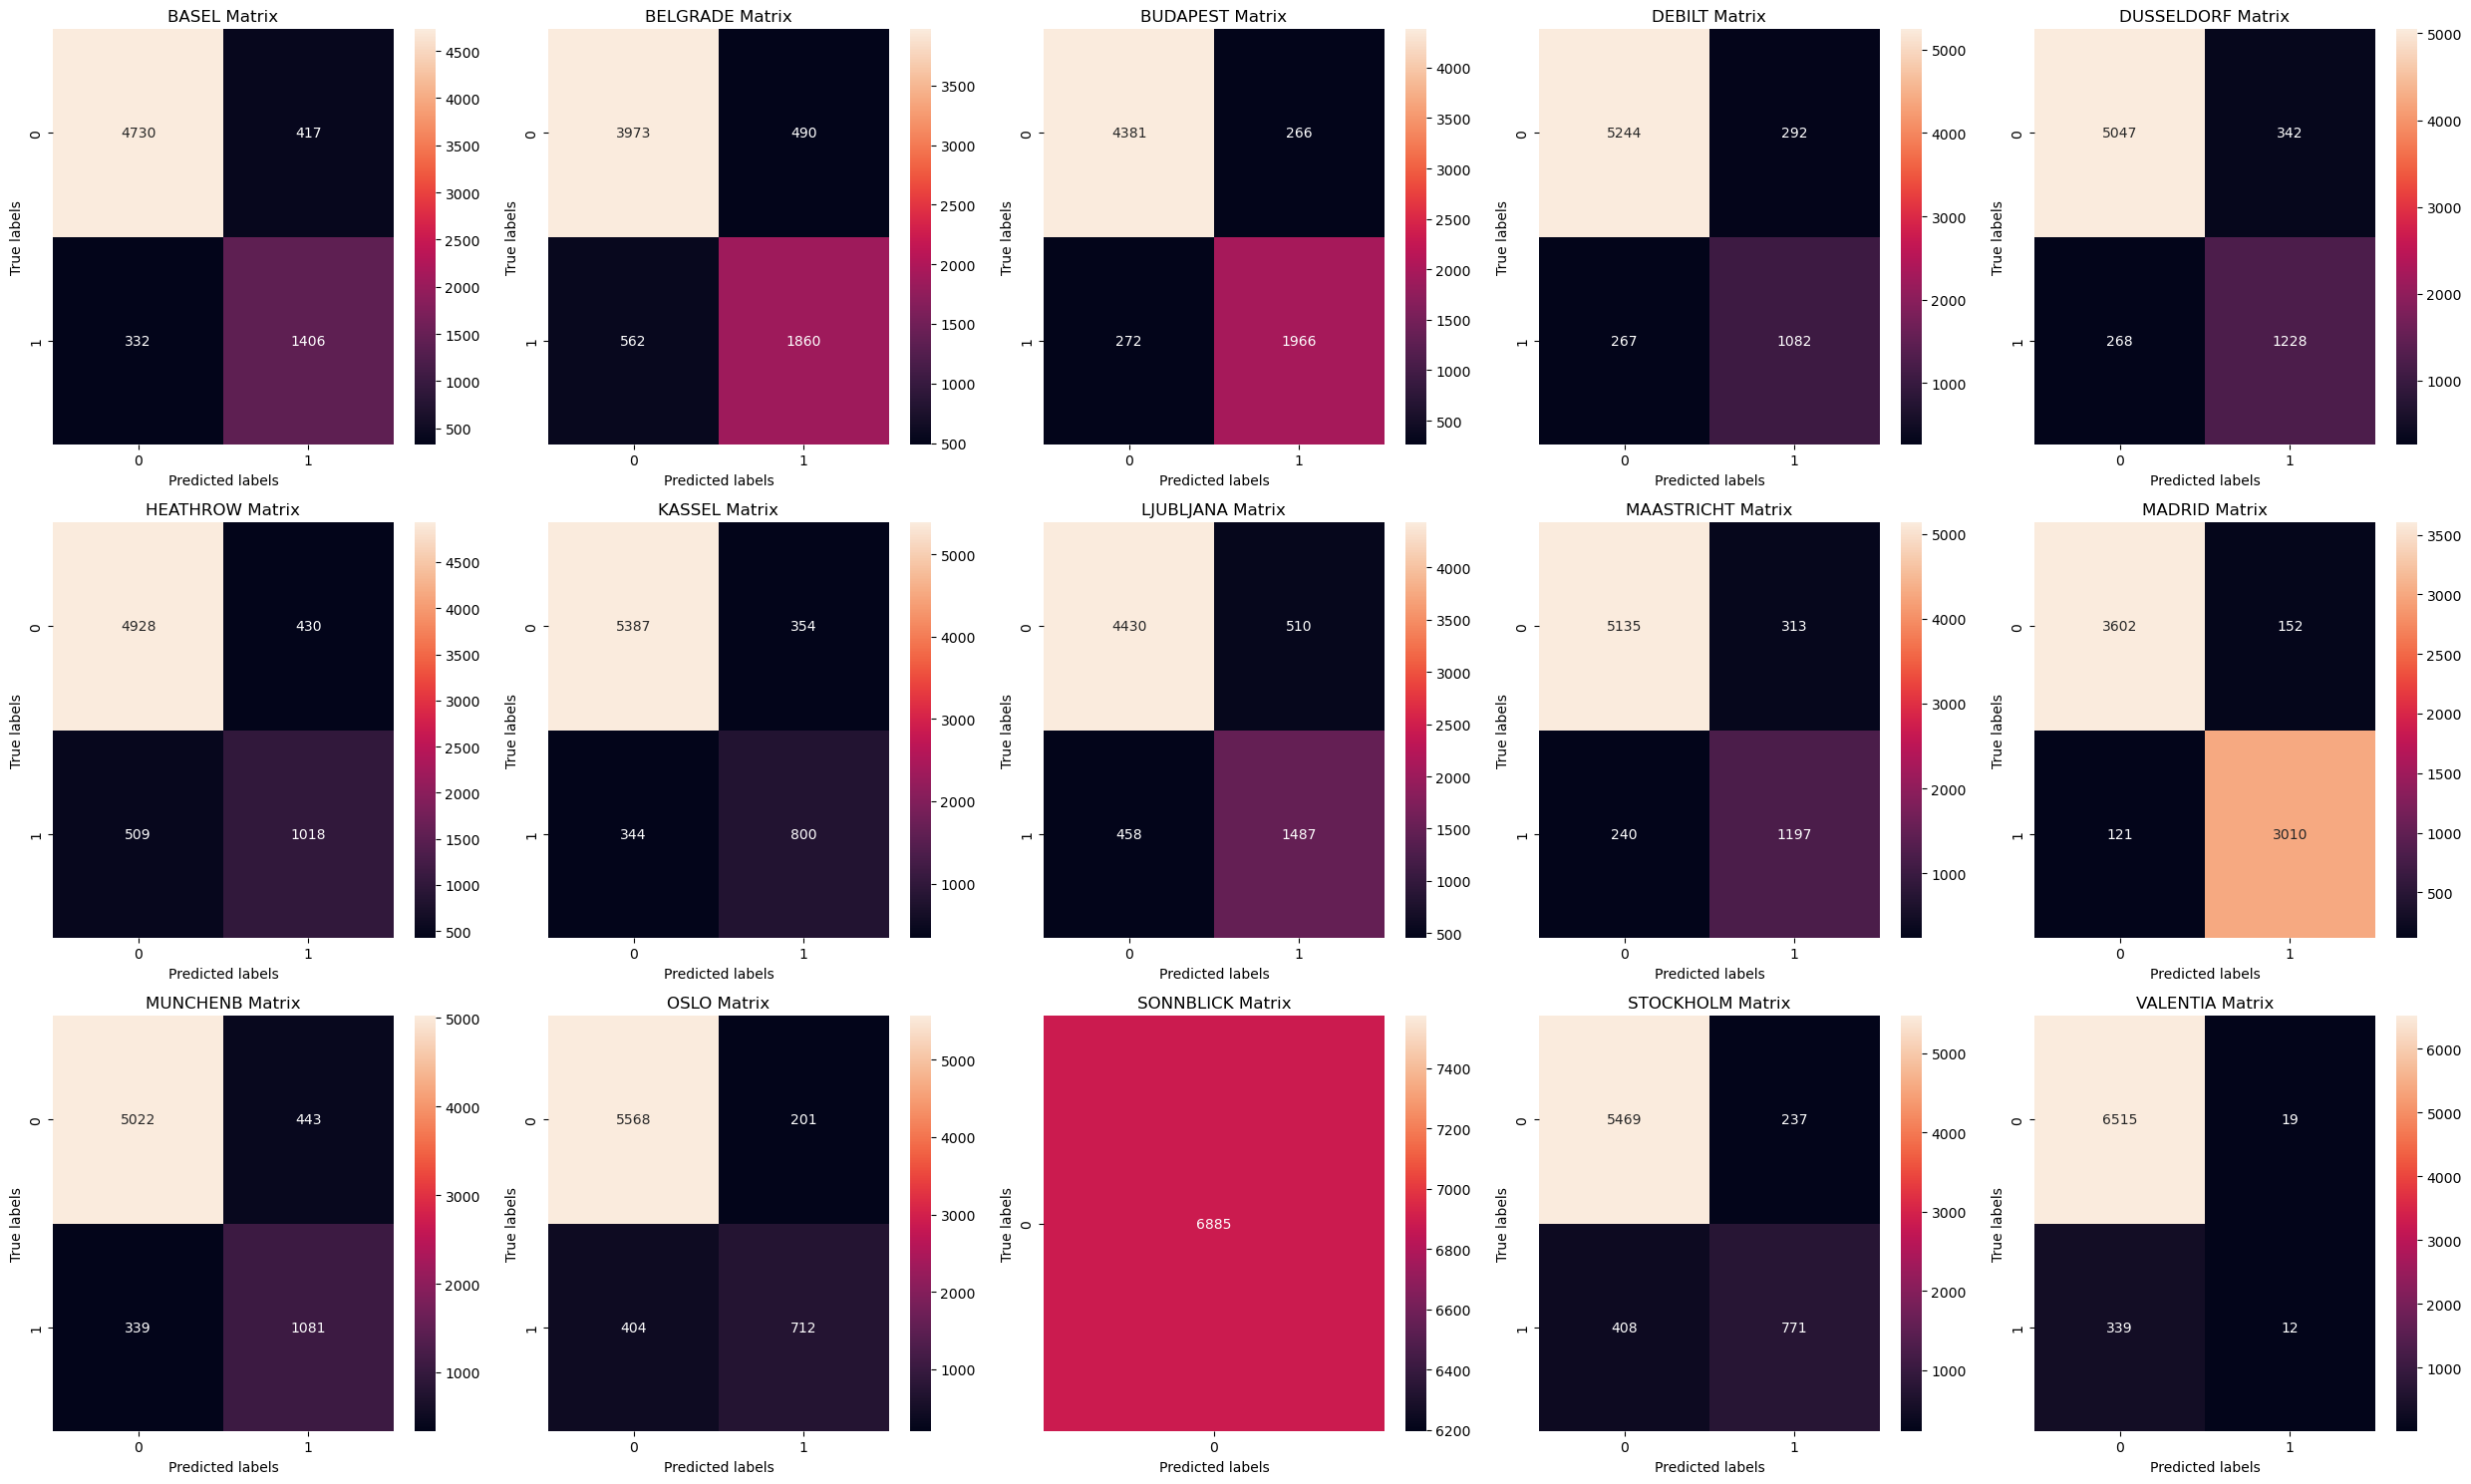

In [52]:
# Print a confusion matrix
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()

# Define key based on the label you're interested in (e.g., weather, categories, etc.)
key = "_pleasant_weather"

# Initialize variables for plotting
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']
count = 0

# Loop to create and plot confusion matrices for each location
for i in range(3):
    for j in range(5):
        name = locations[count]
        # Create confusion matrix for true vs predicted labels
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count])
        
        # Display confusion matrix using Seaborn heatmap
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        
        # Set labels, titles, and ticks for each subplot
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(f'{name} Matrix')
        count += 1

# Display the plot
plt.tight_layout()
plt.show()

The model with 
- Layers: 2
- Nodes: 5 in the first layer, 5 in the second layer
- Max Iterations: 500
- Tolerance: 0.0001

This model converged. 

The accuracies are similar at around 80% in both the training and test data sets which implies that the model has moderate accuracy and is not overfitting.
However, the precision, recall and f1-scores vary between classes (weather stations). For example, the model is predicting station 9 really well, while station 14 is very poor. This implies that the model could may be too simple and over gerneralizing the data and should be optimized further. 

In [54]:
# Create the ANN
mlp = MLPClassifier(hidden_layer_sizes = (20, 10, 5), max_iter = 500, tol = 0.0001)

# Fit the data to the model
mlp.fit(X_train, y_train)

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 10, 5), max_iter=500)

In [55]:
# Generate predictions on training and test sets
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

# Print classification reports for training and test sets
print("Training Set Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_test))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3926
           1       0.98      0.98      0.98      5570
           2       0.82      0.82      0.82      5193
           3       0.85      0.82      0.84      3110
           4       0.90      0.87      0.89      3438
           5       0.71      0.69      0.70      3432
           6       0.76      0.65      0.70      2630
           7       0.84      0.84      0.84      4431
           8       0.88      0.88      0.88      3329
           9       0.97      0.99      0.98      7116
          10       0.81      0.78      0.79      3347
          11       0.71      0.67      0.69      2463
          12       0.00      0.00      0.00         0
          13       0.95      0.96      0.96      2715
          14       0.66      0.16      0.26       823

   micro avg       0.86      0.84      0.85     51523
   macro avg       0.78      0.73      0.74 

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-package

The model with 
- Layers: 3
- Nodes: 20 in the first layer, 10 in the second layer, 5 in the third layer
- Max Iterations: 500
- Tolerance: 0.0001

This model did not converge. 
The accuracies are similar at around 84% in both the training and test data sets which implies that the model has moderate accuracy (higher than the first attempt) and is not overfitting.
The precision, recall and f1-scores vary between classes (weather stations). Here we see that the model is improving its reliability for station 14. While still very low, the more complex model is an improvment. 

In [66]:
# Create the ANN
mlp = MLPClassifier(hidden_layer_sizes = (50, 20, 10), max_iter = 750, tol = 0.00001)

# Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=750, tol=1e-05)

In [67]:
# Generate predictions on training and test sets
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

# Print classification reports for training and test sets
print("Training Set Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_test))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3926
           1       0.99      0.99      0.99      5570
           2       0.98      0.97      0.98      5193
           3       0.84      0.82      0.83      3110
           4       0.91      0.90      0.90      3438
           5       0.96      0.97      0.97      3432
           6       0.93      0.88      0.91      2630
           7       0.95      0.97      0.96      4431
           8       0.88      0.94      0.91      3329
           9       0.99      0.99      0.99      7116
          10       0.96      0.96      0.96      3347
          11       0.82      0.85      0.83      2463
          12       0.00      0.00      0.00         0
          13       0.97      0.99      0.98      2715
          14       0.80      0.43      0.56       823

   micro avg       0.94      0.94      0.94     51523
   macro avg       0.86      0.84      0.85 

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-package

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


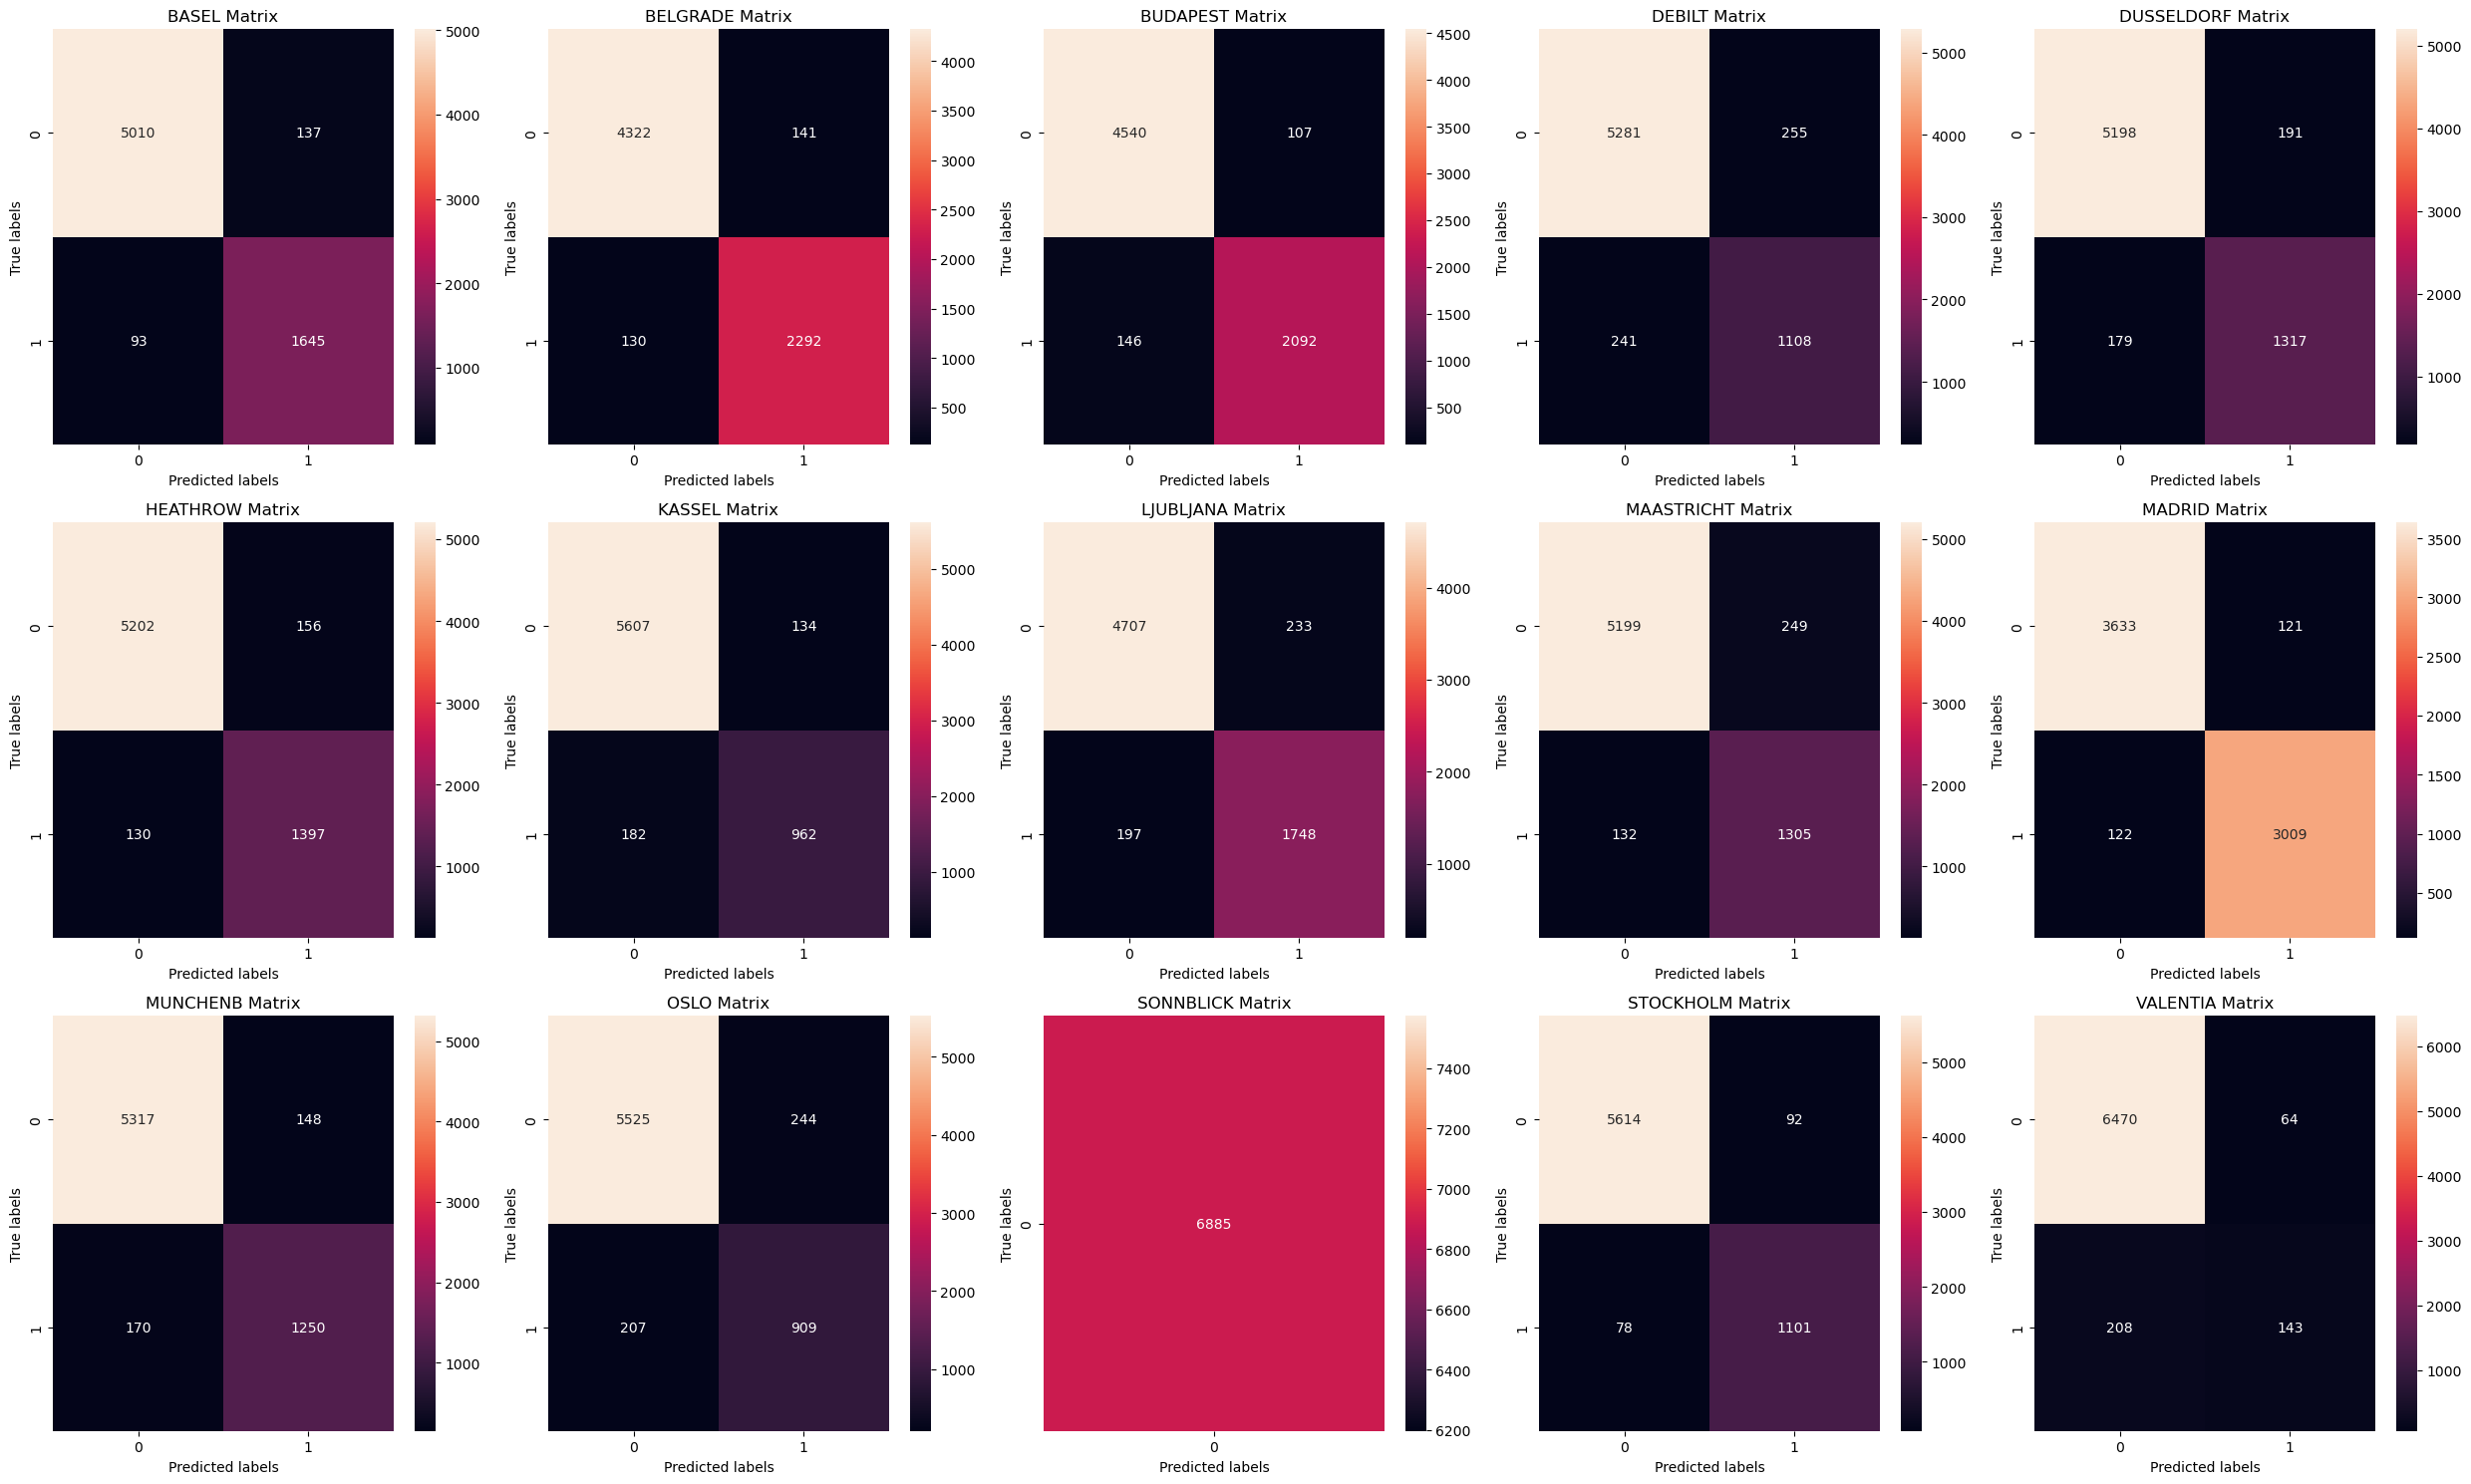

In [68]:
# Print a confusion matrix

locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()

# Define key based on the label you're interested in (e.g., weather, categories, etc.)
key = "_pleasant_weather"

# Initialize variables for plotting
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']
count = 0

# Loop to create and plot confusion matrices for each location
for i in range(3):
    for j in range(5):
        name = locations[count]
        # Create confusion matrix for true vs predicted labels
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count])
        
        # Display confusion matrix using Seaborn heatmap
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        
        # Set labels, titles, and ticks for each subplot
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(f'{name} Matrix')
        count += 1

# Display the plot
plt.tight_layout()
plt.show()

The model with 
- Layers: 3
- Nodes: 50 in the first layer, 20 in the second layer, 10 in the third layer
- Max Iterations: 750
- Tolerance: 0.0001

This model did converge. 

The accuracies are further improved at 94% and 90% respectively on the training and test data sets indicating an fairly highly accurate model. As we can see, the F1 scores are similar for each class in both the training and test sets which is not overfitting.
The precision, recall and f1-scores vary between classes (weather stations). We can also see that the model is learning how to more accurately predict station 14 (we are now at around 50%). 

In [87]:
# Create the ANN
mlp = MLPClassifier(hidden_layer_sizes = (100, 25, 20), max_iter = 1500, tol = 0.00001)

# Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 25, 20), max_iter=1500, tol=1e-05)

In [88]:
# Generate predictions on training and test sets
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

# Print classification reports for training and test sets
print("Training Set Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_test))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3926
           1       0.99      1.00      0.99      5570
           2       0.99      0.99      0.99      5193
           3       0.93      0.97      0.95      3110
           4       0.97      0.96      0.96      3438
           5       0.95      0.99      0.97      3432
           6       0.97      0.97      0.97      2630
           7       0.98      0.99      0.98      4431
           8       0.93      0.96      0.95      3329
           9       1.00      0.99      1.00      7116
          10       0.99      0.97      0.98      3347
          11       0.94      0.96      0.95      2463
          12       0.00      0.00      0.00         0
          13       0.93      1.00      0.96      2715
          14       0.91      0.85      0.88       823

   micro avg       0.97      0.98      0.97     51523
   macro avg       0.90      0.91      0.90 

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashle\anaconda3\Lib\site-package

C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


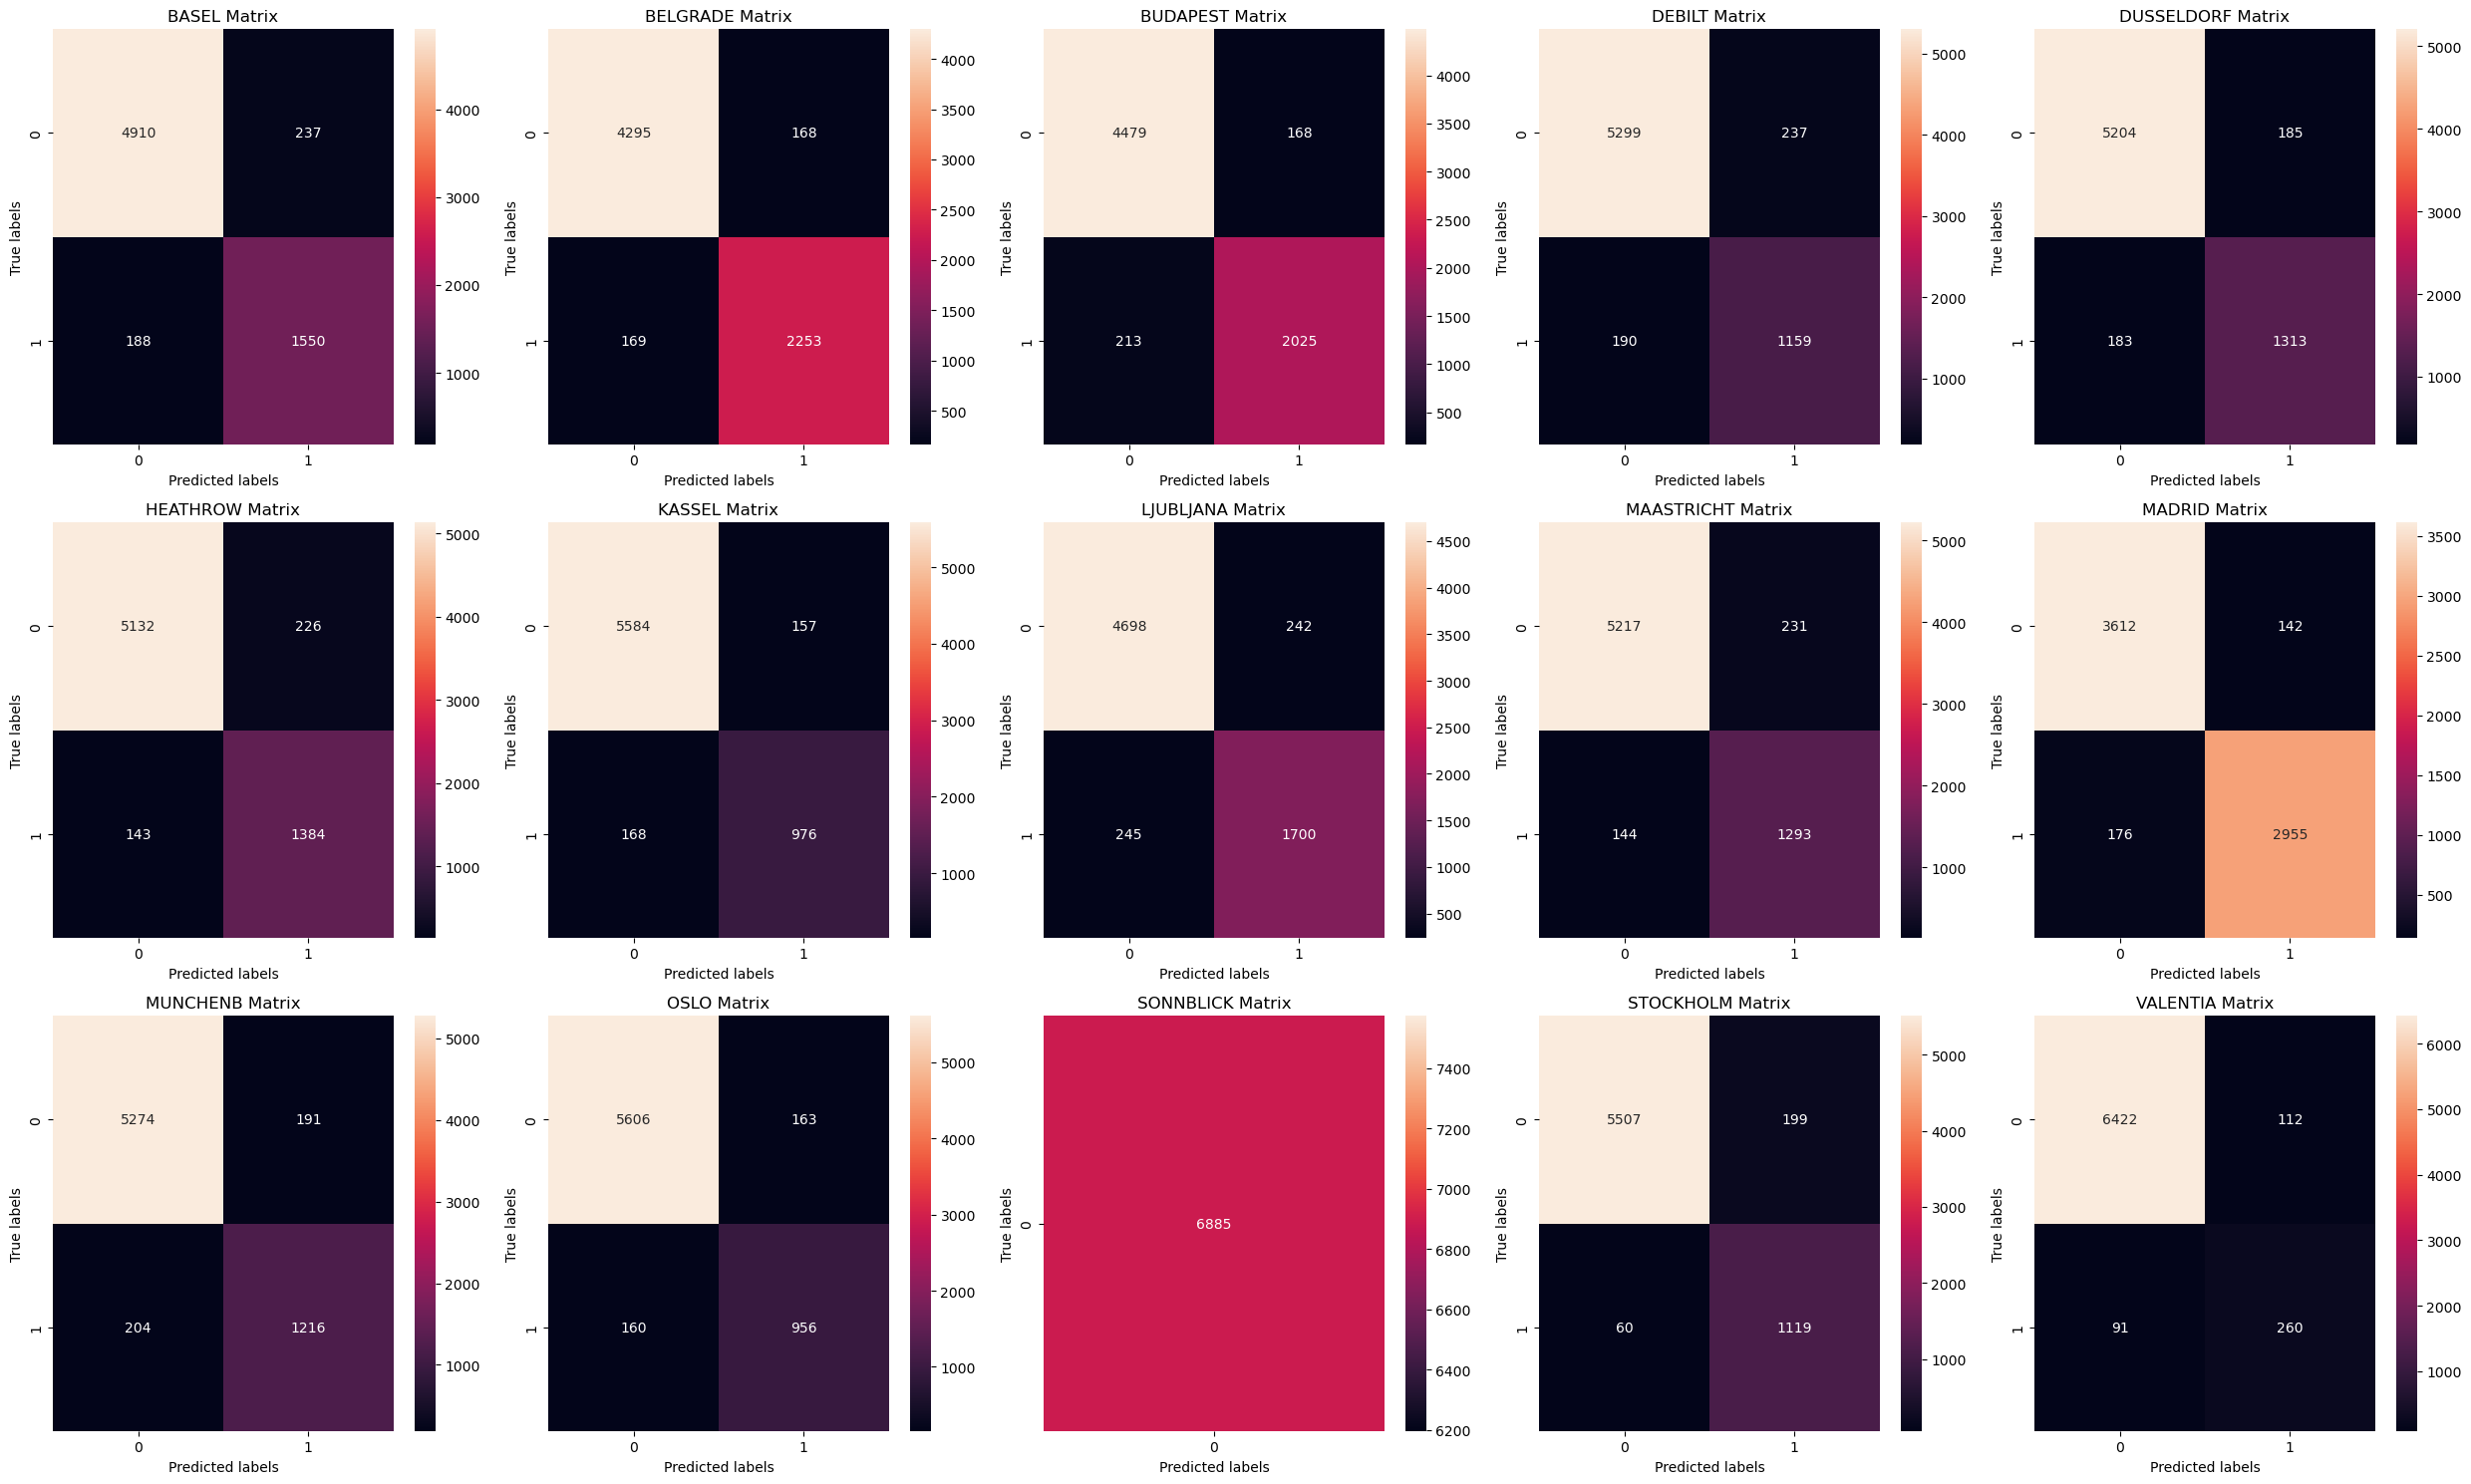

In [91]:
# Print a confusion matrix

locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()

# Define key based on the label you're interested in (e.g., weather, categories, etc.)
key = "_pleasant_weather"

# Initialize variables for plotting
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']
count = 0

# Loop to create and plot confusion matrices for each location
for i in range(3):
    for j in range(5):
        name = locations[count]
        # Create confusion matrix for true vs predicted labels
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count])
        
        # Display confusion matrix using Seaborn heatmap
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        
        # Set labels, titles, and ticks for each subplot
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(f'{name} Matrix')
        count += 1

# Display the plot
plt.tight_layout()
plt.show()

The model with 
- Layers: 3
- Nodes: 100 in the first layer, 25 in the second layer, 20 in the third layer
- Max Iterations: 1500
- Tolerance: 0.0001

This model did converge. 

The accuracies are further improved at 97% and 89% repectively on the training and test data sets indicating a highly accurate model. Similar to the last attempt, the F1 scores higher in this model for both the training and test sets. The scores are similar between training and test sets which implies that the model is not overfitting. The model has gotten significantly better at predicing station 14 (Valentia) with a testing accuracy of 0.72 compared to the initial 0.11. We have a good balance between recall and precision for each class as well. 

Overall, the high F1-scores and balanced performance across classes indicate that this model generalizes well and provides reliable predictions across nearly all classes.